In [141]:
from ipywidgets import widgets
text = widgets.Text()
display(text)

Text(value='')

In [142]:
valor = text.value

Button(description='Armar Timeline', style=ButtonStyle())

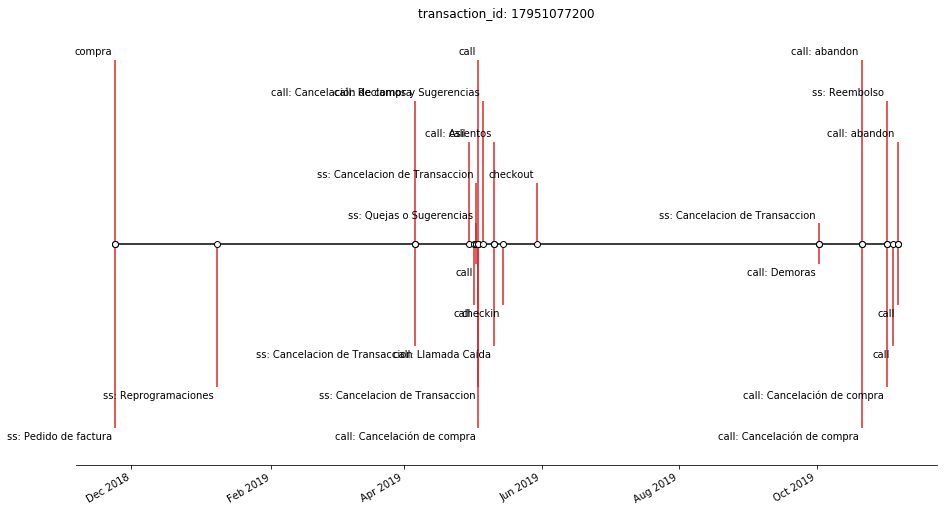

In [146]:
boton = widgets.Button(description='Armar Timeline')
display(boton)
   
def clicker(b):
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.dates as mdates
    from datetime import datetime

    df=pd.read_csv('C:\\Users\\nicolas.vicentini\\timeline.csv')
    df.head()
    names = df['evento'].values
    dates = df['fecha'].values

    num = '17951077200'
    transaction_id = "transaction_id: " + num


    # Convert date strings (e.g. 2014-10-18) to datetime
    dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]
    # Choose some nice levels
    levels = np.tile([-9, 9, -7, 7, -5, 5, -3, 3, -1, 1],
                     int(np.ceil(len(dates)/6)))[:len(dates)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(13, 7), constrained_layout=True)
    ax.set(title=transaction_id)

    markerline, stemline, baseline = ax.stem(dates, levels,
                                             linefmt="C3-", basefmt="k-",
                                             use_line_collection=True)


    plt.setp(markerline, mec="k", mfc="w", zorder=3)

    # Shift the markers to the baseline by replacing the y-data by zeros.
    markerline.set_ydata(np.zeros(len(dates)))

    # annotate lines
    vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
    for d, l, r, va in zip(dates, levels, names, vert):
        ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                    textcoords="offset points", va=va, ha="right")

    # format xaxis with 4 month intervals
    ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=2))
    ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # remove y axis and spines
    ax.get_yaxis().set_visible(False)
    for spine in ["left", "top", "right"]:
        ax.spines[spine].set_visible(False)

    ax.margins(y=0.1)
    plt.show()
    


boton.on_click(clicker)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime


#Referencias
"""
inspired by: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/timeline.html

import matplotlib
matplotlib.axes.Axes.stem
matplotlib.axes.Axes.annotate
matplotlib.axis.Axis.set_major_locator
matplotlib.axis.Axis.set_major_formatter
matplotlib.dates.MonthLocator
matplotlib.dates.DateFormatter
"""

In [51]:

df=pd.read_csv('C:\\Users\\nicolas.vicentini\\timeline.csv')
df.head()
names = df['evento'].values
dates = df['fecha'].values

num = '17951077200'
transaction_id = "transaction_id: " + num


# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

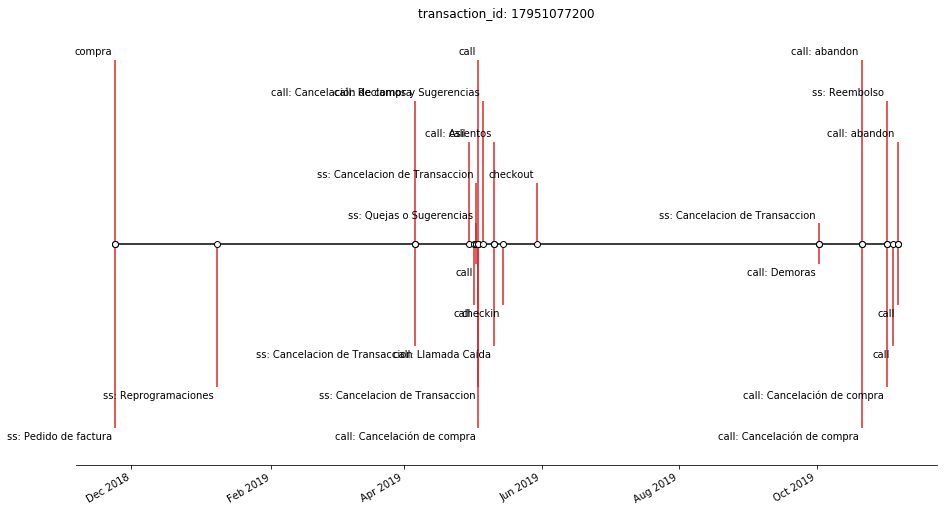

In [69]:
# Choose some nice levels
levels = np.tile([-9, 9, -7, 7, -5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(13, 7), constrained_layout=True)
ax.set(title=transaction_id)

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)


plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=2))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()
#plt.savefig('timeline101.png')
